# MODEL EVALUATION

## REVIEW OF THE LAST CLASS

- Goal was to predict the species of an **unknown iris**
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**SOLUTION:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

## EVALUATION PROCEDURE #1: TRAIN AND TEST ON THE ENTIRE DATASET

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
# read the iris data into a DataFrame
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [29]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [2]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [3]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [30]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# store response vector in "y"
y = iris.species_num

In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_num, Length: 150, dtype: int64

### KNN (K=50)

In [5]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset
knn.fit(X, y)

# predict the response values for the observations in X ("test the model")
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# store the predicted response values
y_pred = knn.predict(X)

## EVALUATION METRIC

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem

Most common choices for classification problems:

- **Classification accuracy**: percentage of correct predictions (reward function)
- **Classification error**: percentage of incorrect predictions (loss function)

In this case, we'll use classification accuracy.

In [ ]:
accuracy= how often it was right about the classification 
error = percentage of incorrect predictions

In [7]:
# compute classification accuracy
from sklearn import metrics
print (metrics.accuracy_score(y, y_pred))
# comapre the right answers y with the predictions y_pred

0.94


This is known as **training accuracy** because we are testing the model on the same data we used to train the model.

### KNN (K=1)

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print (metrics.accuracy_score(y, y_pred))

1.0


Does that mean that K=1 is the best value for K?

### PROBLEM WITH TRAINING AND TESTING ON THE SAME DATA

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data:
    - Will do well when tested using the in-sample data
    - May do poorly on out-of-sample data
    - Learns the "noise" in the data rather than the "signal"
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, training accuracy is not a good estimate of out-of-sample accuracy.**

## EVALUATION PROCEDURE #2: TRAIN/TEST SPLIT

#### STEPS

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

#### WHAT DOES THIS ACCOMPLISH?

- Model can be trained and tested on **different data** (we treat testing data like out-of-sample data).
- Response values are **known** for the testing set, and thus **predictions can be evaluated**.
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance.

### UNDERSTANDING THE `train_test_split` FUNCTION

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [10]:
# before splitting
print (X.shape)

# after splitting
print (X_train.shape)
print (X_test.shape)

(150, 4)
(90, 4)
(60, 4)


In [11]:
# before splitting
print (y.shape)

# after splitting
print (y_train.shape)
print (y_test.shape)

(150,)
(90,)
(60,)


In [12]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
100,6.3,3.3,6.0,2.5
104,6.5,3.0,5.8,2.2
133,6.3,2.8,5.1,1.5
144,6.7,3.3,5.7,2.5
...,...,...,...,...
27,5.2,3.5,1.5,0.2
73,6.1,2.8,4.7,1.2
29,4.7,3.2,1.6,0.2
116,6.5,3.0,5.5,1.8


In [13]:
y_train

50     1
100    2
104    2
133    2
144    2
      ..
27     0
73     1
29     0
116    2
56     1
Name: species_num, Length: 90, dtype: int64

![train_test_split](train_test_split.png)

### UNDERSTANDING THE `random_state` PARAMETER

In [33]:
# WITHOUT a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# print the first element of each object
print (X_train[:1])
print (X_test[:1])
print (y_train[:1])
print (y_test[:1])

    sepal_length  sepal_width  petal_length  petal_width
73           6.1          2.8           4.7          1.2
    sepal_length  sepal_width  petal_length  petal_width
92           5.8          2.6           4.0          1.2
73    1
Name: species_num, dtype: int64
92    1
Name: species_num, dtype: int64


In [35]:
# WITH a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# print the first element of each object
print (X_train[:1])
print (X_test[:1])
print (y_train[:1])
print (y_test[:1])

   sepal_length  sepal_width  petal_length  petal_width
6           4.6          3.4           1.4          0.3
     sepal_length  sepal_width  petal_length  petal_width
128           6.4          2.8           5.6          2.1
6    0
Name: species_num, dtype: int64
128    2
Name: species_num, dtype: int64


## USING THE TRAIN/TEST SPLIT PROCEDURE 
### START WITH K=1

In [16]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [17]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.95


### REPEAT FOR K=50

In [19]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
88,5.6,3.0,4.1,1.3
39,5.1,3.4,1.5,0.2
74,6.4,2.9,4.3,1.3
112,6.8,3.0,5.5,2.1
...,...,...,...,...
50,7.0,3.2,4.7,1.4
87,6.3,2.3,4.4,1.3
104,6.5,3.0,5.8,2.2
129,7.2,3.0,5.8,1.6


In [20]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
128,6.4,2.8,5.6,2.1
18,5.7,3.8,1.7,0.3
130,7.4,2.8,6.1,1.9
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
78,6.0,2.9,4.5,1.5
83,6.0,2.7,5.1,1.6
14,5.8,4.0,1.2,0.2
5,5.4,3.9,1.7,0.4
133,6.3,2.8,5.1,1.5


In [21]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test.values)
print (metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


![Bias-variance tradeoff](bias_variance.png)

### SEARCH FOR THE "BEST" VALUE OF K

In [22]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 50
k_range = range(1, 51)
training_error = []
testing_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # training error
    knn.fit(X.values, y)
    y_pred = knn.predict(X.values)
    training_error.append(1 - metrics.accuracy_score(y, y_pred))
    
    # testing error
    knn.fit(X_train.values, y_train)
    y_pred = knn.predict(X_test.values)
    testing_error.append(1 - metrics.accuracy_score(y_test, y_pred))

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Testing Error')

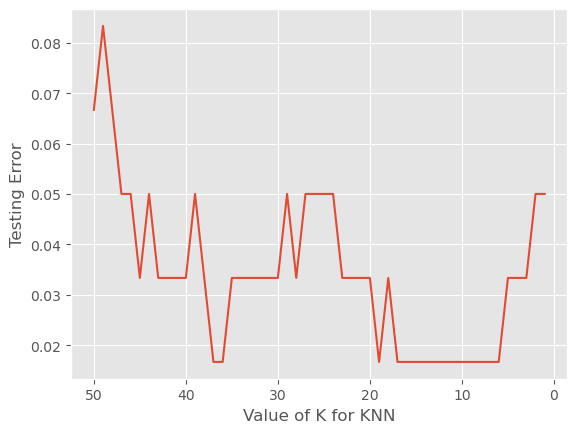

In [24]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
plt.plot(k_range, testing_error)
plt.gca().invert_xaxis()
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')

### WHAT CAN WE CONCLUDE?

- A value of K around 11 is likely the **best value for K** when using KNN on the iris dataset.
- When given the measurements of an **unknown iris**, we estimate that we would be able to correctly predict its species 98% of the time.

### TRAINING ERROR Vs TESTING ERROR

In [25]:
# create a DataFrame of K, training error, and testing error
df = pd.DataFrame({'K': k_range, 'train':training_error, 'test':testing_error}).set_index('K').sort_index(ascending=False)
df

,train,test
K,,
50,0.060000,0.066667
49,0.040000,0.083333
48,0.053333,0.066667
47,0.046667,0.050000
46,0.053333,0.050000
45,0.053333,0.033333
44,0.046667,0.050000
43,0.053333,0.033333
42,0.046667,0.033333


<Axes: xlabel='K'>

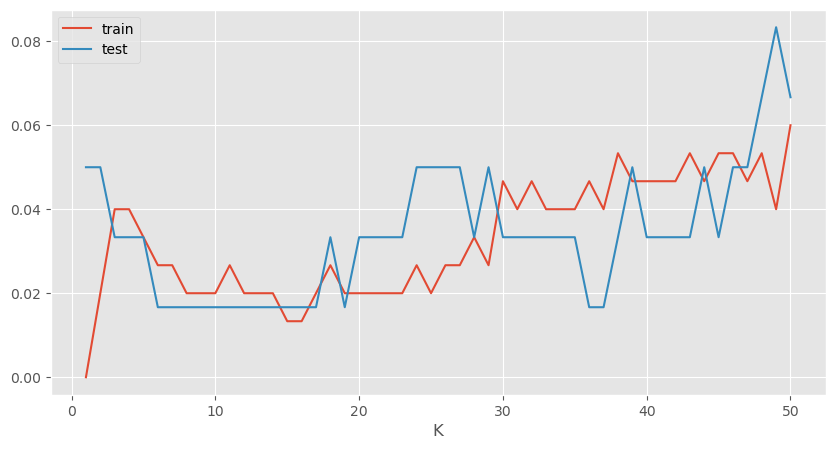

In [26]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot(figsize=(10,5))

### ROUGHLY SPEAKING:

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

## MAKING PREDICTION ON OUT-OF-SAMPLE DATA

#### Given the measurements of a (truly) unknown iris, how do we predict its species?

In [27]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# re-train the model with X and y (not X_train and y_train) - why?
knn.fit(X, y)

# make a prediction for an out-of-sample observation
flower_dimensions = np.array([3, 5, 4, 2])
knn.predict(flower_dimensions.reshape(1, -1))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

## DISADVANTAGES OF TRAIN/TEST SPLIT

####  What would happen if the `train_test_split` function had split the data differently? Would we get the same exact results as before?

In [28]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=78978)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

1.0


- Testing accuracy is a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**

